# ML Enablement Workshop: サービスの解約率改善シナリオ

## コンテンツ

1. ビジネス理解: Business Understanding
2. 環境構築: Environment Setup
3. データ分析: Analyze
4. データ充足: Prepare
4. 前処理: Preprocess
5. 学習: Train
6. 評価: Test
   1. 性能評価
   1. コスト分析
   1. 最適な閾値を探す
---

## 1.ビジネス理解

どのようなビジネスであっても、顧客を失うことは大きな損害です。このシナリオでは、サービスに満足していない顧客を機械学習 (Machine Learning, ML) で自動で認識してアクションをとれるようにする方法を説明します。このような顧客離れの分析は Customer Churn Prediction と呼ばれています。

今回は携帯電話会社での顧客離れ防止を取り上げます。携帯電話会社が、ある顧客が解約しそうと察知したら、その顧客にタイムリーにインセンティブを与えます。インセンティブとは、電話のアップグレードやクーポン、新機能の紹介などです。インセンティブにより引き続き携帯電話会社を使おうと思うかもしれません。インセンティブは、顧客が解約して再度獲得するまでにかかるコストよりもずっと小さいことが多いです。

素朴なビジネス上の欲求として、最小のコストで解約を防ぎたいものです。今回はビジネス KPI を軸に機械学習で解く課題の設定をします。

1. 現状の確認
2. 目標値の設定

### 1.1 現状の確認

解約を防止することで得られる効果は、サービスが継続して利用されることによる LTV (Life Time Value) の向上です。利益ベースの場合、次の式で計算できます。

* LTV = 顧客一人当たりの月次利益 x 平均利用月数
  * = **顧客一人当たりの月次利益 / 月の解約率**

平均利用月数と 1 / 月の解約率が等価になります。継続するということは解約しないということなので、利用月数の期待値は、初月は 1 - 解約率 、次月は ( 1 - 解約率 )^2 ・・・と継続月数分だけ続け、和を取ることになります。数学 B の等比数列の公式を使うとこの式を導けます。

現状の LTV は 450,000 と仮定します。利益については、顧客一人当たりの月次売上を 5,000 円、顧客の解約防止にかけるコストを 10% の 500 円、差し引き利益を 4,500 円としました。解約率は 1% とすると、 4,500 / 0.01 で 450,000 となります。LTV から逆算すると約 100 カ月、8 年使う計算ですが 5 年以上使う方が半数以上との調査があるので、おおむね的を得ている計算結果と思います。

### 1.2 目標値の設定

解約率を 0.5% と業界最低水準にしつつ、解約防止にかけるコストを据え置く目標を設定してみます。この場合、 LTV は 4,500 / 0.005 = 900,000 となります。現状の LTV の 2 倍で、これは解約率が半分になったので当然です。目標値はプロダクトマネージャーなどビジネスを検討する人とコミュニケーションを取り確認する必要があります。今回は、この目標値でプロジェクト開始の承認が下りたとします。プロジェクトの目標は、例えば次のようなものになります。

**解約率を0.5%にしつつ、顧客一人当たりの解約防止コストを500円(売上の10%)に維持することが可能か否かを、3カ月(1Q)で確認する。**

解約防止のインセンティブを検討・送付するのはマーケティング部門などです。そのため、目標の達成は機械学習モデルの精度だけでなくマーケティング部門のオペレーション方法にも大きく左右されます。プロジェクト開始前にビジネス目標を計算で示せるようにし、計算式に関わるステークホルダーを明らかにすることが成功に不可欠です。機械学習活用プロジェクトが失敗する理由の多くはこの最初のビジネス理解のプロセスで防ぐことができます。

機械学習活用プロジェクトが失敗する理由のTop5: 気になる方は[機械学習の価値を計算する](https://youtu.be/csiMBxUkAEc)をぜひご視聴ください！

1. ビジネスの目標がはっきりしていない
2. データの品質が不十分
3. プロジェクトのスポンサーが不在
4. チーム間の連携が不十分
5. データサイエンティストなどの専門職の不在

### 参考文献

* [ゴリゴリの実務者が書いた、LTVを正しく理解・計算する3つのステップ](https://note.biz.moneyforward.com/n/n58355972b335)
* [スマートフォン利用者の月額利用料金は4,617円](https://www.m2ri.jp/release/detail.html?id=525)
* [キャンペーンや新料金プランで市場が流動化し、解約率は3社揃って上昇](https://k-tai.watch.impress.co.jp/docs/column/mca/1345010.html#:~:text=%E5%90%84%E7%A4%BE%E5%85%AC%E8%A1%A8%E6%95%B0%E5%80%A4%E3%81%8B%E3%82%89%E3%80%81%E3%82%B9%E3%83%9E%E3%83%BC%E3%83%88%E3%83%95%E3%82%A9%E3%83%B3,%E3%81%A6%E4%B8%8A%E6%98%87%E3%81%97%E3%81%A6%E3%81%84%E3%82%8B%E3%80%82)
* [「携帯電話の違約金1,000円」の認知度は75.4％](https://mmdlabo.jp/investigation/detail_1806.html)
* [カスタマーサクセスの費用事情：世界のSaaS企業はお金をどう使っているの？](https://success-lab.jp/20171014-2/)

---
## 2.環境構築

プロジェクトを進めるために、機械学習モデルの開発環境を構築します。

今回は Amazon SageMaker Studio Lab を使用し、 Conda による環境構築を行います。 `scenario_churn` フォルダにある `environment.yml` を右クリックして `Build Conda Environment` をクリックすると環境が構築できます。

![environment_setup_001.png](./images/001.png)

完了したら、Jupyter Notebookの右上にある虫の隣のボタンをクリックしカーネルを切り替えます(作成した仮想環境が反映されるまでに少し時間がかかります)。

![environment_setup_002.png](./images/002.png)

ターミナルから環境を構築する場合は、[こちら](https://github.com/aws-samples/aws-ml-enablement-workshop/blob/main/notebooks/00_environment_setup.ipynb)をご確認ください。

環境構築の詳細を知りたい方は、 [機械学習モデルの開発環境を構築する](https://youtu.be/C8VYnJ-DF3I) をご参照ください。

---

## 3.データ分析

携帯電話会社は、どの顧客が最終的に解約したか、または、サービスを使い続けたかの履歴データをもっています。この履歴データで機械学習モデルを学習することで、顧客解約を予想するモデルを構築します。モデルの学習が終わった後、任意の顧客のデータに対し解約しそうかどうかを予測します。もちろん、モデルは誤って予測することも考えられるので、そのような誤りをコストとして考慮する方法を後続の節で紹介します。

顧客の履歴データの格納先は企業によって様々です。開発チームではなくマーケティングチームが利用しているサービスに格納されていることもあるでしょう。サービスによっては、最新データしか保持しないためETLツールを使って定期的にデータウェアハウスへロードして履歴データを作る必要があるかもしれません。

* Salesforce
* HubSpot
* Relational Database (MySQLやPostgreSQLなど)
* Firestore
* Google SpreadSheet / Notion
* Google Analytics (BigQuery)

ビジネス理解のフェーズでビジネス目標を明確にしておくことで、データを保持している部門やデータの抽出処理を依頼するチームの協力が得やすくなります。例えば、単にデータ分析で何かやってみたいからデータをくださいと言っても協力を得るのは難しいでしょう。「業界トップの解約率0.5%を達成し LTV を最大化するために・・・」というのとは説得力が違います。

今回は、素晴らしいことにデータがすでに手に入っていることとします。ここで利用するデータセットは書籍 [Discovering Knowledge in Data](https://www.amazon.com/dp/0470908742/) で Daniel T. Larose が言及しているもので、一般に利用可能です。データセットは、著者によって University of California Irvine Repository of Machine Learning Datasets へ提供されています。ここでは、そのデーセットをダウンロードして読み込みます。

はじめに、使用するライブラリを読み込みます。

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from IPython.display import display
import xgboost

`data/raw`フォルダにある`churn.txt` を `pandas` を利用して読み込みます。 `pandas` は、表形式のデータを読み込んで、様々な加工ができるライブラリです。例えば、以下を実行すると表形式でのデータ表示が可能です。

In [2]:
data_root = Path("../../data/")
churn = pd.read_csv(data_root.joinpath("raw/churn.txt"))
pd.set_option("display.max_columns", len(churn.columns))
churn

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,PA,163,806,403-2562,no,yes,300,8.162204,3,7.579174,3.933035,4,6.508639,4.065759,100,5.111624,4.928160,6,5.673203,3,True.
1,SC,15,836,158-8416,yes,no,0,10.018993,4,4.226289,2.325005,0,9.972592,7.141040,200,6.436188,3.221748,6,2.559749,8,False.
2,MO,131,777,896-6253,no,yes,300,4.708490,3,4.768160,4.537466,3,4.566715,5.363235,100,5.142451,7.139023,2,6.254157,4,False.
3,WY,75,878,817-5729,yes,yes,700,1.268734,3,2.567642,2.528748,5,2.333624,3.773586,450,3.814413,2.245779,6,1.080692,6,False.
4,WY,146,878,450-4942,yes,no,0,2.696177,3,5.908916,6.015337,3,3.670408,3.751673,250,2.796812,6.905545,4,7.134343,6,True.
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,NH,4,787,151-3162,yes,yes,800,10.862632,5,7.250969,6.936164,1,8.026482,4.921314,350,6.748489,4.872570,8,2.122530,9,False.
4996,SD,140,836,351-5993,no,no,0,1.581127,8,3.758307,7.377591,7,1.328827,0.939932,300,4.522661,6.938571,2,4.600473,4,False.
4997,SC,32,836,370-3127,no,yes,700,0.163836,5,4.243980,5.841852,3,2.340554,0.939469,450,5.157898,4.388328,7,1.060340,6,False.
4998,MA,142,776,604-2108,yes,yes,600,2.034454,5,3.014859,4.140554,3,3.470372,6.076043,150,4.362780,7.173376,3,4.871900,7,True.


データは 5,000 行で、現在の機械学習としてはやや小さいデータセットです。各データのレコードは、ある米国の携帯電話会社の顧客プロフィールに関する 21 の属性からなります。

- `State` : 顧客が居住している米国州で、2文字の省略形で記載されます (OHとかNJのように)
- `Account Length` : アカウントが利用可能になってからの経過日数
- `Area Code` : 顧客の電話番号に対応する3桁のエリアコード
- `Phone` : 残りの7桁の電話番号
- `Int’l Plan` : 国際電話のプランに加入しているかどうか (yes/no)
- `VMail Plan` : Voice mail の機能を利用しているかどうか (yes/no)
- `VMail Message` : 1ヶ月の Voice mail のメッセージの平均長
- `Day Mins` : 1日に通話した時間(分)の総和
- `Day Calls` : 1日に通話した回数の総和
- `Day Charge` : 日中の通話にかかった料金
- `Eve Mins, Eve Calls, Eve Charge` : 夜間通話にかかった料金
- `Night Mins`, `Night Calls`, `Night Charge` : 深夜通話にかかった料金
- `Intl Mins`, `Intl Calls`, `Intl Charge` : 国際通話にかかった料金
- `CustServ Calls` : カスタマーサービスに電話をかけた回数
- `Churn?` : そのサービスから解約したかどうか (true/false)

皆さんのサービスは携帯電話ではありませんが、 `Int’l Plan` や `VMail Plan` は有償プランや特定機能の利用有無、 `Day Mins` や `Day Calls` は 1 日の利用時間、 1 日のログイン回数などに置き換えて考えていただければと思います。

最後の属性 `Churn?` が機械学習モデルで予測する対象になります。予測の対象は**目的変数**と呼ばれます。今回の目的変数は 2 値 (binary) なので、今回作成するモデルは 2 値の予測を行います。これは 2 値分類といわれます。

それではデータを詳しく見てみます。

まずは各列のデータ型を確認します。ここで、選択項目のようなカテゴリデータは、`State`, `Area code`, `Phone`, `Int’l Plan`, `VMail Plan`, `Churn?`です。カテゴリを表す文字列や数値がデータとして与えられています。 `pandas` ではある程度自動で、カテゴリデータを認識し、`object` というタイプでデータを保存します。


In [3]:
churn.dtypes

State              object
Account Length      int64
Area Code           int64
Phone              object
Int'l Plan         object
VMail Plan         object
VMail Message       int64
Day Mins          float64
Day Calls           int64
Day Charge        float64
Eve Mins          float64
Eve Calls           int64
Eve Charge        float64
Night Mins        float64
Night Calls         int64
Night Charge      float64
Intl Mins         float64
Intl Calls          int64
Intl Charge       float64
CustServ Calls      int64
Churn?             object
dtype: object

`object` 形式のデータは、選択式項目や文字列のデータです。こうした変数を **カテゴリ変数** と呼びます。たとえば、ユーザーの所在地 ( 千葉県や東京都 ) サービス利用有無です。

* `Area code` は本来 `object` として扱うべきですが数値データとみなされているようなので、非数値に変換しましょう。
* `Phone` については、ユーザーに対しほぼ一意のIDとなっています。 Idから解約するか予測できるわけではないので、使うのは止めるべきでしょう(ただ、最初の3桁はなにか意味がありそうなので、意味があるとわかれば分析する価値はあるかもしれません)。

In [4]:
churn['Area Code'] = churn['Area Code'].astype(object)
churn = churn.drop('Phone', axis=1)

`describe()` を利用すると各属性の統計量を一度に見ることができます。

In [5]:
churn.select_dtypes(include=['object']).describe()

,State,Area Code,Int'l Plan,VMail Plan,Churn?
count,5000,5000,5000,5000,5000
unique,51,33,2,2,2
top,RI,777,no,yes,False.
freq,120,317,2507,2512,2502


`count` は件数、 `unique` は項目数です。 `yes` / `no` の 2 値である `Int'l Plan` は 2 になっています。当然ですが電話番号である `Phone` は件数と項目数が一致するはずです ( 1 件ずれているのは、本当なら確認が必要かもしれません ) 。

カテゴリ変数について、どの項目がどれぐらい出現しているか確認します。`pandas` では `value_counts` を使い項目数の数え上げができます。 `normalize=True` を指定することで、値を数から割合にすることができます。

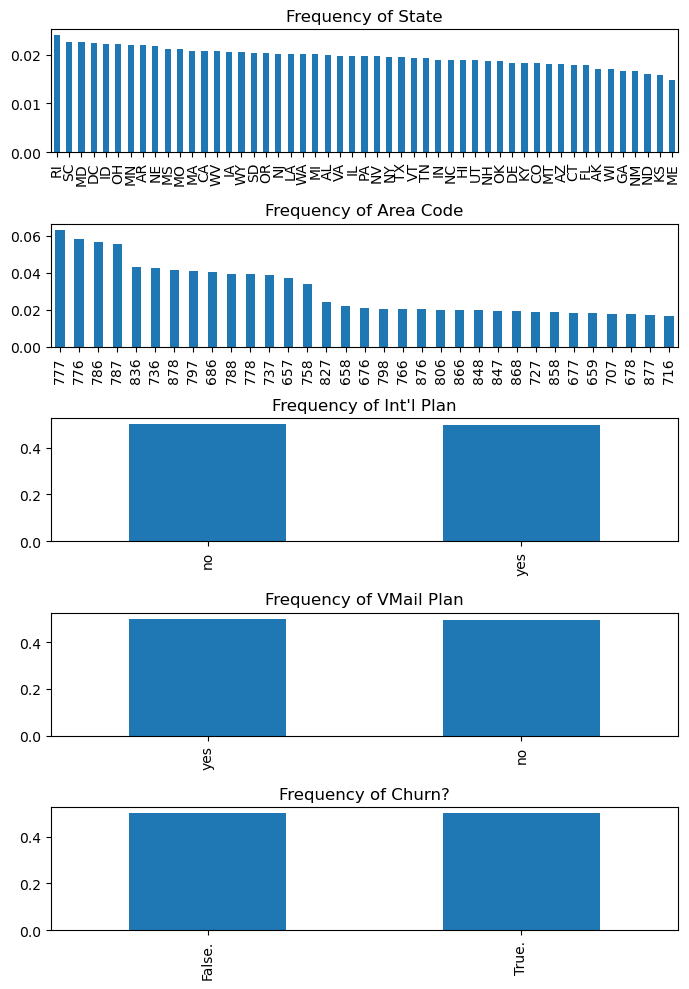

In [6]:
categorical_columns = churn.select_dtypes(include=['object']).columns
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(7, 10))
for i, column in enumerate([c for c in churn.select_dtypes(include=["object"]).columns]):
        title = f"Frequency of {column}"
        churn[column].value_counts(normalize=True).sort_values(ascending=False).plot.bar(title=title, ax=axes[i])
plt.tight_layout()

データセット中に偏りがあまりないことがわかります。目的変数 `Churn?` が True か False かで、顧客の各属性をわけてみます。

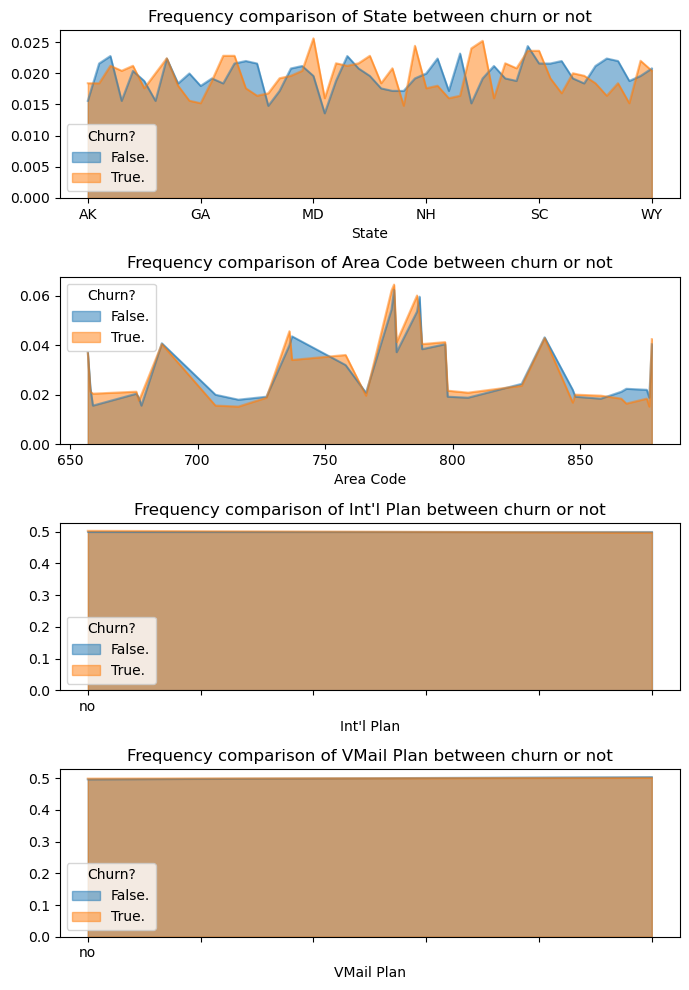

In [7]:
fig, axes = plt.subplots(nrows=len(categorical_columns) - 1, ncols=1, figsize=(7, 10))
for i, column in enumerate([c for c in categorical_columns if c != "Churn?"]):
        title = f"Frequency comparison of {column} between churn or not"
        pd.crosstab(index=churn[column], columns=churn["Churn?"], normalize='columns').plot.area(title=title, ax=axes[i], stacked=False)
plt.tight_layout()

`object` 形式のデータの分析から次のことが読み取れます。

- 各項目の頻度はだいたい一様に分布しています。解約したか否かでも分布は変わりません。

続いて、数値のデータに関して統計量とデータの分布を確認します。

In [8]:
churn.select_dtypes(exclude=['object']).describe()

,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
count,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,101.675800,226.680000,5.518757,3.50460,5.018902,5.026199,3.140400,5.017557,4.000917,224.790000,5.023490,5.025876,5.475400,4.328242,5.525800
std,57.596762,273.998527,3.433485,1.68812,2.195759,2.135487,2.525621,2.127857,1.631001,97.302875,1.748900,1.019302,1.877045,2.440311,2.041217
min,1.000000,0.000000,0.000215,0.00000,0.004777,0.004659,0.000000,0.013573,0.008468,0.000000,0.054863,1.648514,0.000000,0.000769,0.000000
25%,52.000000,0.000000,2.682384,2.00000,3.470151,3.588466,1.000000,3.529613,2.921998,150.000000,3.873157,4.349726,4.000000,2.468225,4.000000
50%,102.000000,0.000000,5.336245,3.00000,4.988291,5.145656,3.000000,5.006860,3.962089,200.000000,5.169154,5.034905,5.000000,4.214058,6.000000
75%,151.000000,400.000000,7.936151,5.00000,6.559750,6.552962,5.000000,6.491725,5.100128,300.000000,6.272015,5.716386,7.000000,5.960654,7.000000
max,200.000000,1300.000000,16.897529,10.00000,12.731936,13.622097,14.000000,12.352871,10.183378,550.000000,10.407778,8.405644,12.000000,14.212261,13.000000


array([[<AxesSubplot:title={'center':'Account Length'}>,
        <AxesSubplot:title={'center':'VMail Message'}>,
        <AxesSubplot:title={'center':'Day Mins'}>,
        <AxesSubplot:title={'center':'Day Calls'}>],
       [<AxesSubplot:title={'center':'Day Charge'}>,
        <AxesSubplot:title={'center':'Eve Mins'}>,
        <AxesSubplot:title={'center':'Eve Calls'}>,
        <AxesSubplot:title={'center':'Eve Charge'}>],
       [<AxesSubplot:title={'center':'Night Mins'}>,
        <AxesSubplot:title={'center':'Night Calls'}>,
        <AxesSubplot:title={'center':'Night Charge'}>,
        <AxesSubplot:title={'center':'Intl Mins'}>],
       [<AxesSubplot:title={'center':'Intl Calls'}>,
        <AxesSubplot:title={'center':'Intl Charge'}>,
        <AxesSubplot:title={'center':'CustServ Calls'}>, <AxesSubplot:>]],
      dtype=object)

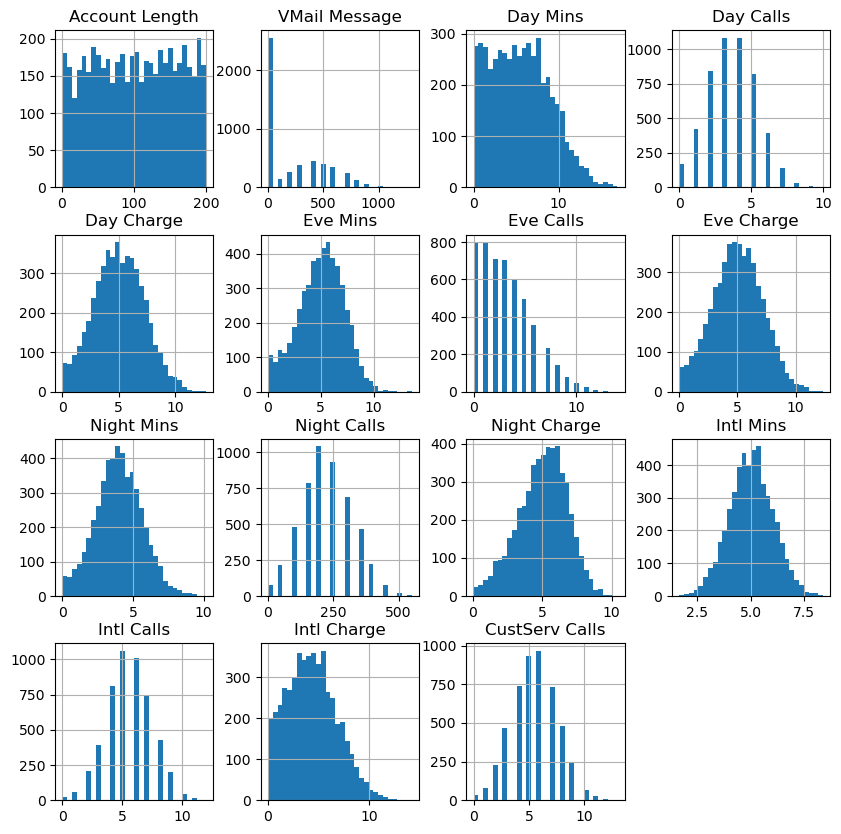

In [9]:
churn.select_dtypes(exclude=['object']).hist(bins=30, figsize=(10, 10))

数値データの多くは釣り鐘のようなガウス分布をしています。ただ、VMail Messageは例外です。  
数値データも、目的変数 `Churn?` が True か False かで分布が変わるか見てみます。オレンジが解約、青が解約しないユーザーです。

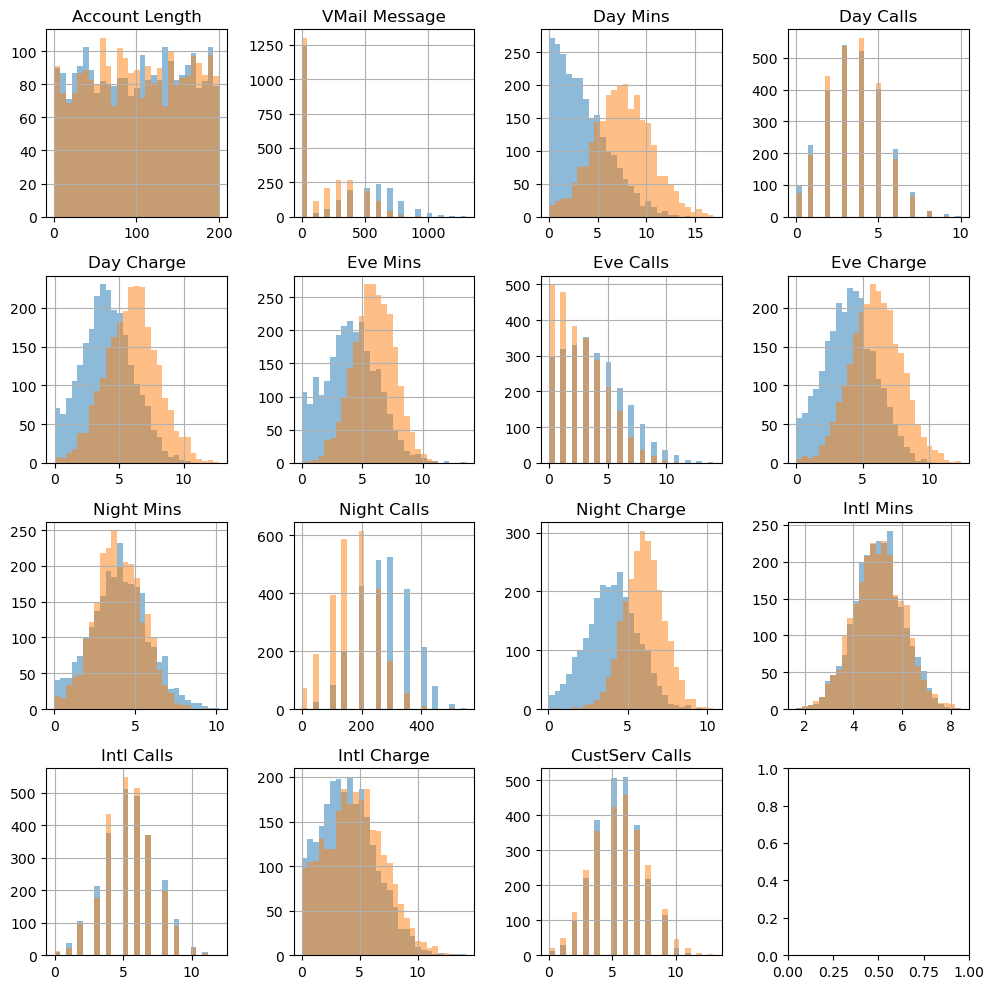

In [10]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(10, 10))
for i, column in enumerate(churn.select_dtypes(exclude=['object']).columns):
    row = i // 4
    col = i % 4
    hist = churn[[column, "Churn?"]].groupby("Churn?").hist(
            bins=np.linspace(churn[column].min(),
            churn[column].max(), 30), ax=axes[row, col], alpha=0.5)

plt.tight_layout()

データ分析の結果から、解約する顧客について、以下のような傾向が考えられます。

- 地理的にほぼ一様に分散している
- VoiceMailをあまり利用していない
- 通話時間で見ると長い通話時間と短い通話時間の人に分かれる( `Day Mins` ,  `Day Charge` など)
- カスタマーサービスへの若干通話が多い (多くの問題を経験した顧客ほど解約するというのは理解できる)

加えて、解約する顧客に関しては、`Day Mins` と `Day Charge` で似たような分布を示しています。しかし、話せば話すほど、通常課金されるので、驚くことではないです。もう少し深く調べてみましょう。`corr()` を利用すると相関係数を求めることができます。

In [11]:
corr = churn.corr()
corr.style.background_gradient(cmap="Greens").set_precision(2)

C:\Users\ttaakkaa\AppData\Local\Temp\ipykernel_27176\173422500.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient(cmap="Greens").set_precision(2)


,Account Length,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
Account Length,1.00,-0.01,-0.02,0.01,-0.01,0.00,0.03,-0.01,0.02,-0.00,-0.03,0.02,-0.00,0.03,-0.04
VMail Message,-0.01,1.00,-0.14,0.00,-0.18,-0.10,-0.10,-0.03,0.06,0.14,-0.16,-0.02,0.13,0.01,0.07
Day Mins,-0.02,-0.14,1.00,-0.09,0.67,0.48,-0.18,0.77,0.19,-0.45,0.57,0.00,0.24,0.24,-0.20
Day Calls,0.01,0.00,-0.09,1.00,-0.22,0.03,0.19,-0.05,-0.09,-0.08,0.05,-0.02,-0.05,-0.12,-0.07
Day Charge,-0.01,-0.18,0.67,-0.22,1.00,0.57,0.24,0.37,0.15,-0.13,0.37,0.01,0.12,0.25,-0.26
Eve Mins,0.00,-0.10,0.48,0.03,0.57,1.00,-0.07,0.27,-0.09,0.07,0.32,-0.02,0.07,0.45,-0.17
Eve Calls,0.03,-0.10,-0.18,0.19,0.24,-0.07,1.00,-0.47,0.22,0.22,-0.32,-0.00,-0.11,0.02,-0.43
Eve Charge,-0.01,-0.03,0.77,-0.05,0.37,0.27,-0.47,1.00,0.18,-0.45,0.55,-0.00,0.16,0.24,-0.01
Night Mins,0.02,0.06,0.19,-0.09,0.15,-0.09,0.22,0.18,1.00,-0.22,-0.14,-0.01,0.04,0.27,-0.33
Night Calls,-0.00,0.14,-0.45,-0.08,-0.13,0.07,0.22,-0.45,-0.22,1.00,-0.39,-0.01,0.18,-0.16,0.11


いくつかの特徴は互いに100%の相関をもっています。このような特徴があるとき、機械学習のアルゴリズムによっては全くうまくいかないことがあり、そうでなくても結果が偏ったりしてしまうことがあります。これらの相関の強いペアは削除することが好ましいです。Day Mins に対する Day Charge、Night Mins に対する Night Charge、Intl Mins に対する Intl Charge を削除します。

In [12]:
churn = churn.drop(['Day Charge', 'Eve Charge', 'Night Charge', 'Intl Charge'], axis=1)

データ分析の過程でデータ項目の削除や修正を行いましたが、これが妥当かどうかについてはデータを扱っているアナリストや業務に詳しドメインエキスパートにヒアリングすべきでしょう。より詳しいデータ分析プロセスの進め方は [データから価値を創出できるか診断する](https://youtu.be/iYV4slOPoYE) をご参照ください。

ここまででデータの分析は完了です。

---
## 4.データ充足

もし分析した結果データの追加や修正が必要な場合は、 `Prepare` の工程でデータを整備すべきです。例えば、携帯電話の番号は実際は個人が特定できない地区までの番号が使えるのに誤って全部マスクされていた、というような場合は修正の依頼を行いデータを整備します。

今回はデータはすでに整備されているとして `Preprocess` に進みます。

---
## 5.前処理

機械学習モデルは数値データしか扱えないため、カテゴリ変数は数値データに変換する必要があります。 `get_dummies()` はカテゴリ変数を数値データへ変換する処理の一つです。 `Int'l Plan` は `yes` と `no` 2 つの項目を持っていますが、その項目ごとに該当する場合は 1 、そうでない場合 0 とする列を作ります。これを One-hot エンコーディングと呼びます。

In [13]:
pd.get_dummies(churn["Int'l Plan"])

,no,yes
0,1,0
1,0,1
2,1,0
3,0,1
4,0,1
...,...,...
4995,0,1
4996,1,0
4997,1,0
4998,0,1


`get_dummies()` を使い、目的変数である `Churn?` 以外のすべての項目に対し One-hot エンコーディングを行います。

In [14]:
model_data = pd.get_dummies(churn.loc[:, churn.columns != "Churn?"])

C:\tools\miniconda3\envs\ml-handson-churn\lib\site-packages\pandas\core\algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [15]:
model_data = pd.concat([churn["Churn?"].apply(lambda x: 1 if x == "True." else 0), model_data], axis=1)
model_data

,Churn?,Account Length,VMail Message,Day Mins,Day Calls,Eve Mins,Eve Calls,Night Mins,Night Calls,Intl Mins,...,Area Code_858,Area Code_866,Area Code_868,Area Code_876,Area Code_877,Area Code_878,Int'l Plan_no,Int'l Plan_yes,VMail Plan_no,VMail Plan_yes
0,1,163,300,8.162204,3,3.933035,4,4.065759,100,4.928160,...,0,0,0,0,0,0,1,0,0,1
1,0,15,0,10.018993,4,2.325005,0,7.141040,200,3.221748,...,0,0,0,0,0,0,0,1,1,0
2,0,131,300,4.708490,3,4.537466,3,5.363235,100,7.139023,...,0,0,0,0,0,0,1,0,0,1
3,0,75,700,1.268734,3,2.528748,5,3.773586,450,2.245779,...,0,0,0,0,0,1,0,1,0,1
4,1,146,0,2.696177,3,6.015337,3,3.751673,250,6.905545,...,0,0,0,0,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0,4,800,10.862632,5,6.936164,1,4.921314,350,4.872570,...,0,0,0,0,0,0,0,1,0,1
4996,0,140,0,1.581127,8,7.377591,7,0.939932,300,6.938571,...,0,0,0,0,0,0,1,0,1,0
4997,0,32,700,0.163836,5,5.841852,3,0.939469,450,4.388328,...,0,0,0,0,0,0,1,0,0,1
4998,1,142,600,2.034454,5,4.140554,3,6.076043,150,7.173376,...,0,0,0,0,0,0,0,1,0,1


データを学習用、バリデーション用、テスト用にわけておきます。これによって Overfitting (学習用データには精度が良いが、実際に利用すると精度が悪い、といった状況) を検出しやすくなり、未知のテストデータに対する精度を確認することができます。

In [16]:
train_data, validation_data, test_data = np.split(model_data.sample(frac=1, random_state=1729), [int(0.7 * len(model_data)), int(0.9 * len(model_data))])
train_data.to_csv(data_root.joinpath("interim/churn_train.csv"), header=False, index=False)
validation_data.to_csv(data_root.joinpath("interim/churn_validation.csv"), header=False, index=False)
test_data.to_csv(data_root.joinpath("interim/churn_test.csv"), header=False, index=False)

学習には学習用データとバリデーション用データのみを使用し、テスト用データは評価に使用します。

---
## 6.学習

機械学習のアルゴリズムを決めましょう。解約する度合いを数値の大小で表すモデルが良さそうです。線形回帰のようなアルゴリズムでも予測が行えますが、今回は勾配ブースティング木 (Gradient Boosted Tree)を利用します。 XGBoost は、特徴感の非線形な関係を考慮した勾配ブースティング木を利用しており、特徴間の複雑な関連性を扱うことができます。

それでは学習を始めましょう。まず、説明変数と目的変数にデータを分けます。

In [17]:
train_x, train_y = train_data.drop(['Churn?'], axis=1), train_data['Churn?']
test_x, test_y = test_data.drop(['Churn?'], axis=1), test_data['Churn?']

XGBoost のモデルを作成し、学習を開始します

In [18]:
# xgboostモデルの作成
clf = xgboost.XGBClassifier()
# xgboostモデルの学習
clf.fit(train_x, train_y)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, ...)

モデルの学習は驚くほどあっという間です。近年は機械学習モデルを自動で構築する Auto ML の技術も発達しているため、ゼロからモデルを作る機会はどんどん減ってくるかもしれません。

決定着のモデルは特徴に対する重みを分析することができます。`feature_importances_` で重みを可視化してみましょう。

<AxesSubplot:>

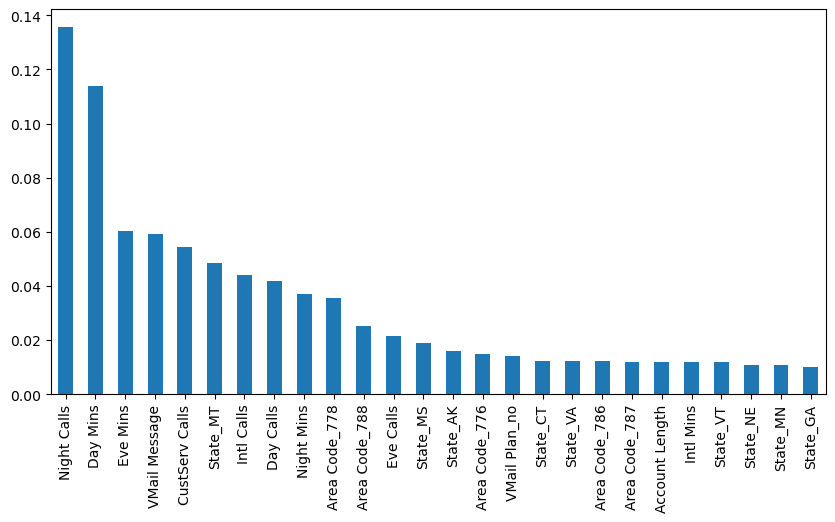

In [19]:
pd.Series(clf.feature_importances_, index=clf.feature_names_in_)[lambda x: x > 0.01].sort_values(ascending=False).plot.bar(figsize=(10, 5))

データ分析の結果、解約しているか否かで分布に差があった `Night Calls` や `Day Minus` が重要と判断されています。夜間時間帯の通話や料金、品質やサービスに課題があるのかもしれません。実際のデータからは、特定プランに加入しているユーザーの解約率が特に高いことがわかるかもしれません。モデルの解釈と人間の解釈があっていることを確認することは重要です。

---
## 7.評価

機械学習モデルができたので、ビジネス目標を達成できるかどうか評価を行います。

### 7-1.性能評価

まず機械学習モデルの性能を評価します。

In [20]:
predictions = clf.predict_proba(test_x)
predictions = predictions[:, 1]

機械学習の性能を評価する方法はいくつかありますが、単純に、予測値と実際の値を比較しましょう。今回は、顧客が解約する `1` と解約しない `0` を予測しますので、この混同行列を作成します。混合行列は以下のように表されます。行列の各要素には、予測が当たっていれば True 、はずれていれば False で、それに予測対象の種別 Positive / Negative を付与した名前が付けられています。

![environment_setup_003.png](./images/003.png)


In [21]:
confusion_matrix = pd.crosstab(index=test_data.iloc[:, 0], columns=np.round(predictions), rownames=['actual'], colnames=['predictions'])
confusion_matrix

predictions,0.0,1.0
actual,,
0,237,16
1,10,237


※ アルゴリズムにはランダムな要素があるので結果は必ずしも一致しません._

247人の解約者がいて、それらの237名 (true positives) を正しく予測できました。そして、16名の顧客は解約すると予測しましたが、解約していません (false positives)。10名の顧客は解約しないと予測したにもかかわらず解約してしまいました (false negatives)。

性能を評価する指標として、 主に精度(`Accuracy`)、適合率(`Precision`)、再現率(`Recall`)、という 3 つの指標があります。 3 つの指標はそれぞれ評価の観点が異なります。一般的には、適合率と再現率の調和平均である F1 を評価指標として使うことが多いです ( 以下の図は、[機械学習帳の学習ノート](https://github.com/icoxfog417/mlnote-note)の図を転用しています )。

![004.png](images/004.png)

`sklearn.metrics` の `classification_report` を使うと簡単に計算することができます。 F1 の値は `0.95` なのでよく予測できていそうです。

In [22]:
from sklearn.metrics import classification_report


print(classification_report(test_data.iloc[:, 0], np.round(predictions)))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       253
           1       0.94      0.96      0.95       247

    accuracy                           0.95       500
   macro avg       0.95      0.95      0.95       500
weighted avg       0.95      0.95      0.95       500



重要な点として、解約するかどうかを `np.round()` という関数で、しきい値0.5で判断しています。`xgboost` が出力する値は0から1までの連続値で、それらを解約する `1` と 解約しない `0` に分類します。解約されてしまった場合の影響は大きいため、しきい値を0.5から下げて、少しでも可能性があれば解約するとみなす必要があるかもしれません。閾値を下げることで false negatives (解約しないと予測して解約した）を減らすことができます。ただ、false positives （解約すると予測したけど解約しなかった）は増えることになります。 

直感的な理解のため、予測結果の連続値をみてみましょう。

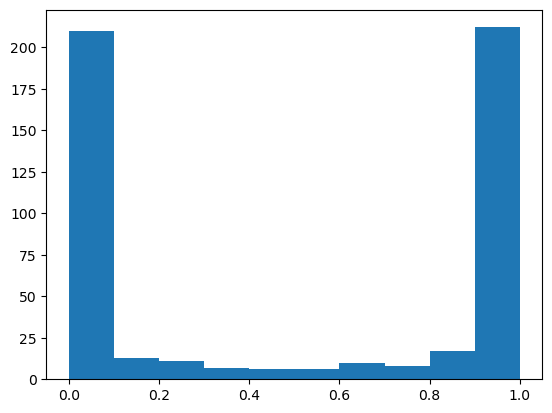

In [23]:
plt.hist(predictions)
plt.show()

解約しない 0 、 解約する 1 いずれかに偏っており、0.1 から 0.9 までの間でしきい値を設定するのはよさそうです。 `0.3` にしてみましょう。

In [24]:
confusion_matrix_changed = pd.crosstab(index=test_data.iloc[:, 0], columns=np.where(predictions > 0.3, 1, 0))
confusion_matrix_changed

col_0,0,1
Churn?,,
0,228,25
1,6,241


In [25]:
confusion_matrix_changed - confusion_matrix

col_0,0,1
Churn?,,
0,-9,9
1,-4,4


しきい値を0.5から0.3まで減らしてみたとき、true positives は 4 つ、false positives は 9 つ増え、false negatives は 4 つ減りました。全体の約7%の顧客に対する予測結果が代わったことになります。ここで 4 名にインセンティブを与えることによって、インセンティブのコストが掛かりますが顧客を引き止めることができるかもしれません。最適な閾値を決めることはコスト最適化を行うために重要です。

### 7-2. コスト分析

コスト最適化を行うため。機械学習モデルの予測に応じたコストの割り当てを行います。

1. True Negative: 解約しない顧客を正確に予測できた場合、コストは発生しないため 0 円とします。
2. False Negative: 実際は解約してしまった場合です。失った顧客を再度獲得するコストとして、200,000 円を設定します (※)。
3. True Positive: 解約を予測できた場合、インセンティブとして 500 円までのインセンティブで解約を防止します。
3. False Positive: 実際は解約しなかった場合です。インセンティブ 500 円のインセンティブは本来不要だったことになります。

※ 新規顧客の獲得コストである Customer Acquisition Cost ( 顧客獲得コスト ) は、LTV の 1 / 3 となることを目指すのが通説です。今回は 1 / 3 よりやや多め ( = 新規獲得のコストがかかっており、コストをかけて獲得した顧客に解約されたくない状態 ) を想定しています。

なお、インセンティブは単なるクーポン以外にオンボーディングの支援なども含みます。解約するふりをするとクーポンがもらえるという仕組みはユーザーの質を下げるため、顧客離反防止のためにクーポンを発行するケースは少ないと思います。

この設定のもと、コストが最小になるような閾値を探索します。

### 7-3.最適な閾値を探す

コストの関数は以下のようなものになります。

```txt
cost(C) = 200,000 * FN(C) + 0 * TN(C) + 500 * FP(C) + 500 * TP(C)
```

FN(C) は false negative の割合で、しきい値 C(cutoff) の関数です。同様にTN, FP, TP も用意します。この関数の値が最小となるようなしきい値 C を探します。
最も単純な方法は、候補となる閾値で何度もシミュレーションをすることです。以下では100個の値に対してループで計算を行います。

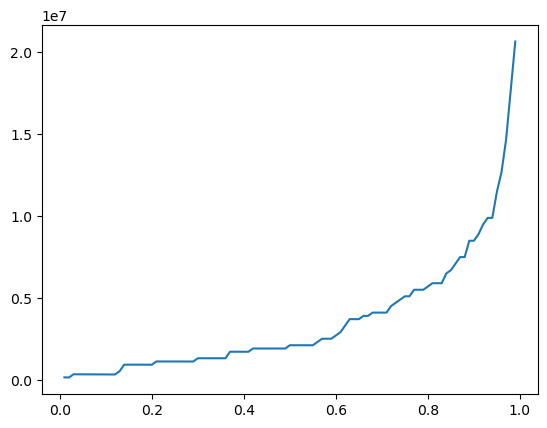

コストが最小となるしきい値は: 0.02 であり、その際のコストは: 159000 です。


In [26]:
cutoffs = np.arange(0.01, 1, 0.01)
costs = []

for c in cutoffs:
    _predictions = pd.Categorical(np.where(predictions > c, 1, 0), categories=[0, 1])
    matrix_a = np.array([[0, 500], [200000, 500]])
    matrix_b = pd.crosstab(index=test_data.iloc[:, 0], columns=_predictions, dropna=False)
    costs.append(np.sum(np.sum(matrix_a * matrix_b)))

costs = np.array(costs)
plt.plot(cutoffs, costs)
plt.show()
print('コストが最小となるしきい値は:', cutoffs[np.argmin(costs)], 'であり、その際のコストは:', np.min(costs),'です。')

最適な閾値の時のコストが得られました。顧客一人当たりのコストを計算してみましょう。

In [27]:
np.min(costs) / len(test_data)

318.0

目標の500円より低い値になっています。ただし、実際に解約率が 0.5% になるかは機械学習モデルの検証だけではわかりません。
マーケティング部門の協力を得て機械学習モデルの予測に基づくオペレーションを実施してみて、解約率とコストの 2 つの目標が達成できるかを検証します。

機械学習プロジェクトの成果は機械学習モデルのみから得られるものではないことは覚えておくべきことです。ビジネス理解で作成した価値の計算式に関わる関係者と協力することで、はじめて目標が達成できます。